# Bank Marketing - Exploratory Data Analysis

## Background
This project analyzes the Portuguese bank's marketing campaign data to predict whether a client will subscribe to a term deposit. The marketing campaigns involved in this project were based on phone calls. And it is common that more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

By using different ML classification models, we aim to build the most reliable prediction model and identify the most influential factors in predicting a customer's decision of subscribing to a term deposit. Such insights can be used to optimize future marketing outreach and improve the bank's marketing strategy.

## Data Source  
The dataset is sourced from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing), containing client profile information,records of direct marketing campaigns (phone calls), and socio-economic indicators from a Portuguese banking institution.

Four datasets were created from the original UCI dataset.

1. `bank-additional-full.csv`: Full dataset with all 41188 records, 20 inputs, ordered by date (from May 2008 to nov 2010). Similar to the data analyzed in [Moro et al., 2014].
2. `bank-additional.csv`: 10% of the examples (4119 records) from `bank-additional-full.csv`. 20 inputs.
3. `bank-full.csv`: Same dataset as 1, but with 17 inputs, ordered by date (it's an older version of the dataset, hence less inputs). Not included in the repo.
4. `bank.csv`: 10% of the examples (4119 records) from `bank-full.csv`. Similarly, 17 inputs. Not included in the repo.

Only 1) and 2) files are included in the repo, and we use only `bank-additional-full.csv` for this analysis.

## Column Descriptions  

- Customer Profile
1. age: Age of the client. (numeric)
2. job: Type of job. (categorical)
3. marital: Marital status. (categorical)
4. education: Level of education. (categorical)
5. default: Has credit in default? (categorical)
6. housing: Has a housing loan? (categorical)
7. loan: Has a personal loan? (categorical)

- Contact & Campaign Attributes
8. contact: Communication type. (categorical)
9. month: Last contact month of the year. (categorical)
10. day_of_week: Last contact day of the week. (categorical)
11. duration: Last contact duration in seconds. (numeric)  
   \* *This is a post-hoc variable, not available at the time of before the call. So it's best not to be used for realistic predictive purposes.*
12. campaign: Number of contacts performed during **this** campaign. (numeric; starting from 1)
13. pdays: Days passed since the client was last contacted from a **previous** campaign (999 represents never). (numeric)
14. previous: Number of contacts performed **before this campaign**. (numeric)
15. poutcome: Outcome of the previous marketing campaign. (categorical)

- Socio-Economic Indicators
16. emp_var_rate: Employment variation rate - quarterly indicator. (removed for high correlation)
17. cons_price_idx: Consumer price index - monthly indicator.
18. cons_conf_idx: Consumer confidence index - monthly indicator.
19. euribor3m: Euribor 3 month rate - daily indicator.
20. nr_employed: Number of employees - quarterly indicator. (removed for high correlation)

- Target / Deposit Subscription 
21. y: Has the client subscribed a term deposit? (Target)


In [62]:
df.cons_conf_idx.unique().shape

(26,)


## Objective
The goal of this section is to perform an exploratory analysis of the Bank Marketing dataset to understand the data distribution, identify patterns, and uncover relationships between features and the target variable (term deposit subscription).

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization styles
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading and Overview

In [11]:
# Load the dataset
# Using the same path as the modeling notebook
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

df.columns = df.columns.str.replace('.', '_')
# Display first few rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Dataset info
print(f"Shape of dataset: {df.shape}")
df.info()

Shape of dataset: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  c

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Data already cleaned. No missing data
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


## 2. Target Variable (`y`)

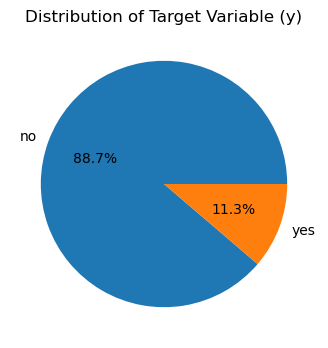

In [84]:
# Calculate class imbalance
target_counts = df['y'].value_counts()

plt.figure(figsize=(6, 4))
# sns.countplot(x='y', data=df, palette='viridis')
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Target Variable (y)')
plt.show()

In [85]:
print(target_counts)

y
no     36548
yes     4640
Name: count, dtype: int64


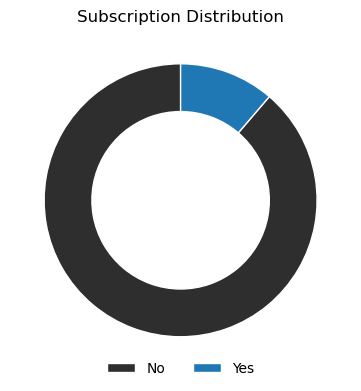

In [73]:
# Get a donut plot:
colors = ["#2E2E2E", "#1F77B4"]

labels = ["No", "Yes"]
sizes = df['y'].value_counts(normalize=True).values
fig, ax = plt.subplots(figsize=(6, 4))
wedges, _ = ax.pie(
    sizes,
    startangle=90,
    labels=None,
    colors=colors,
    wedgeprops=dict(width=0.35, edgecolor="white")
)

ax.set(aspect="equal")
ax.legend(
    wedges, labels,
    loc="lower center",
    ncol=2,
    frameon=False,
    bbox_to_anchor=(0.5, -0.05)
)
ax.set_title('Subscription Distribution')
plt.tight_layout()
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
plt.show()

## 3. Univariate Analysis
Analyzing independent variables one by one.

In [13]:
# Separate num and cat columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

categorical_cols.remove('y')
    
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


### Numerical Features Distribution

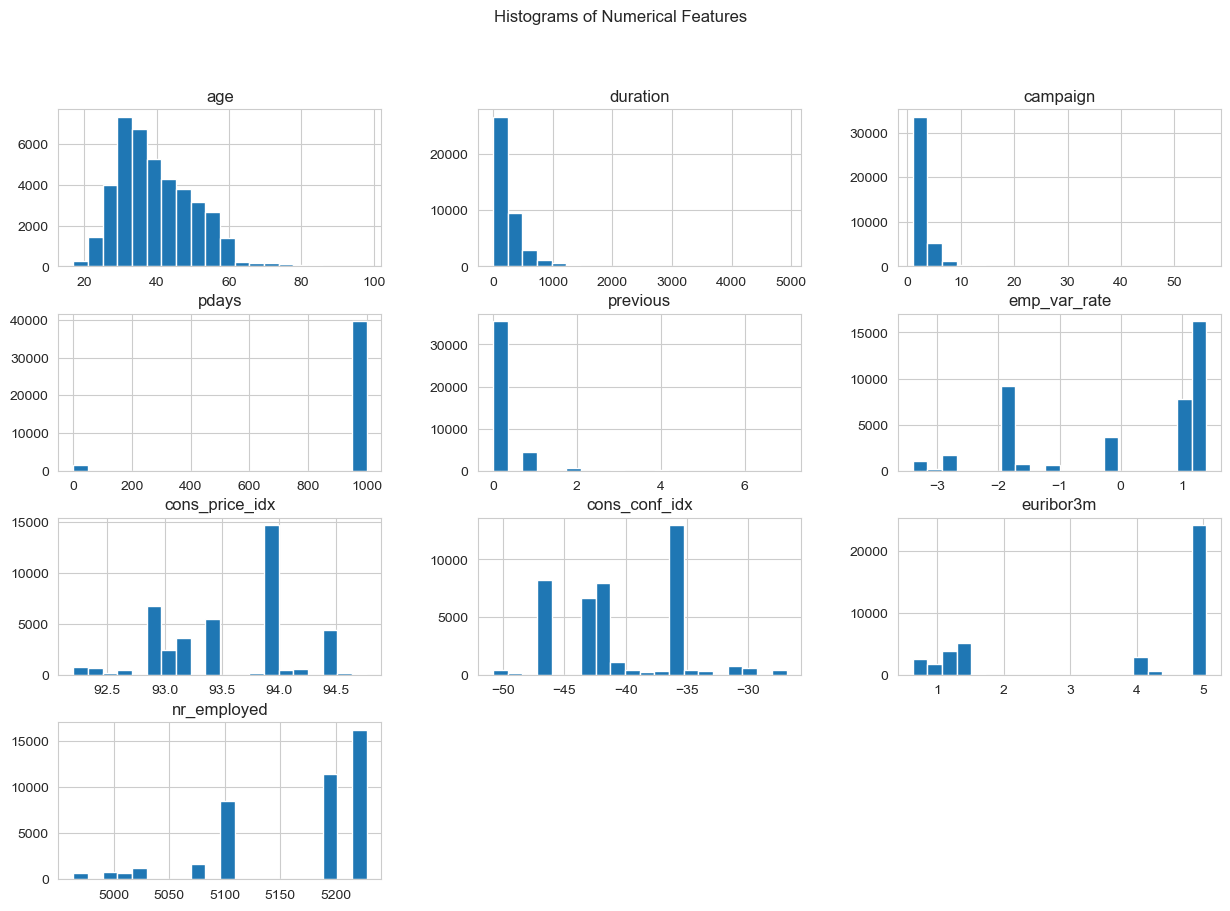

In [29]:
# Plot histograms for numeric features
df[numeric_cols].hist(bins=20, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [118]:
# sns.histplot(data=df, x='age', hue='y', bins=30, alpha=0.5, palette=colors)
# plt.title('Age')
# plt.show()

df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

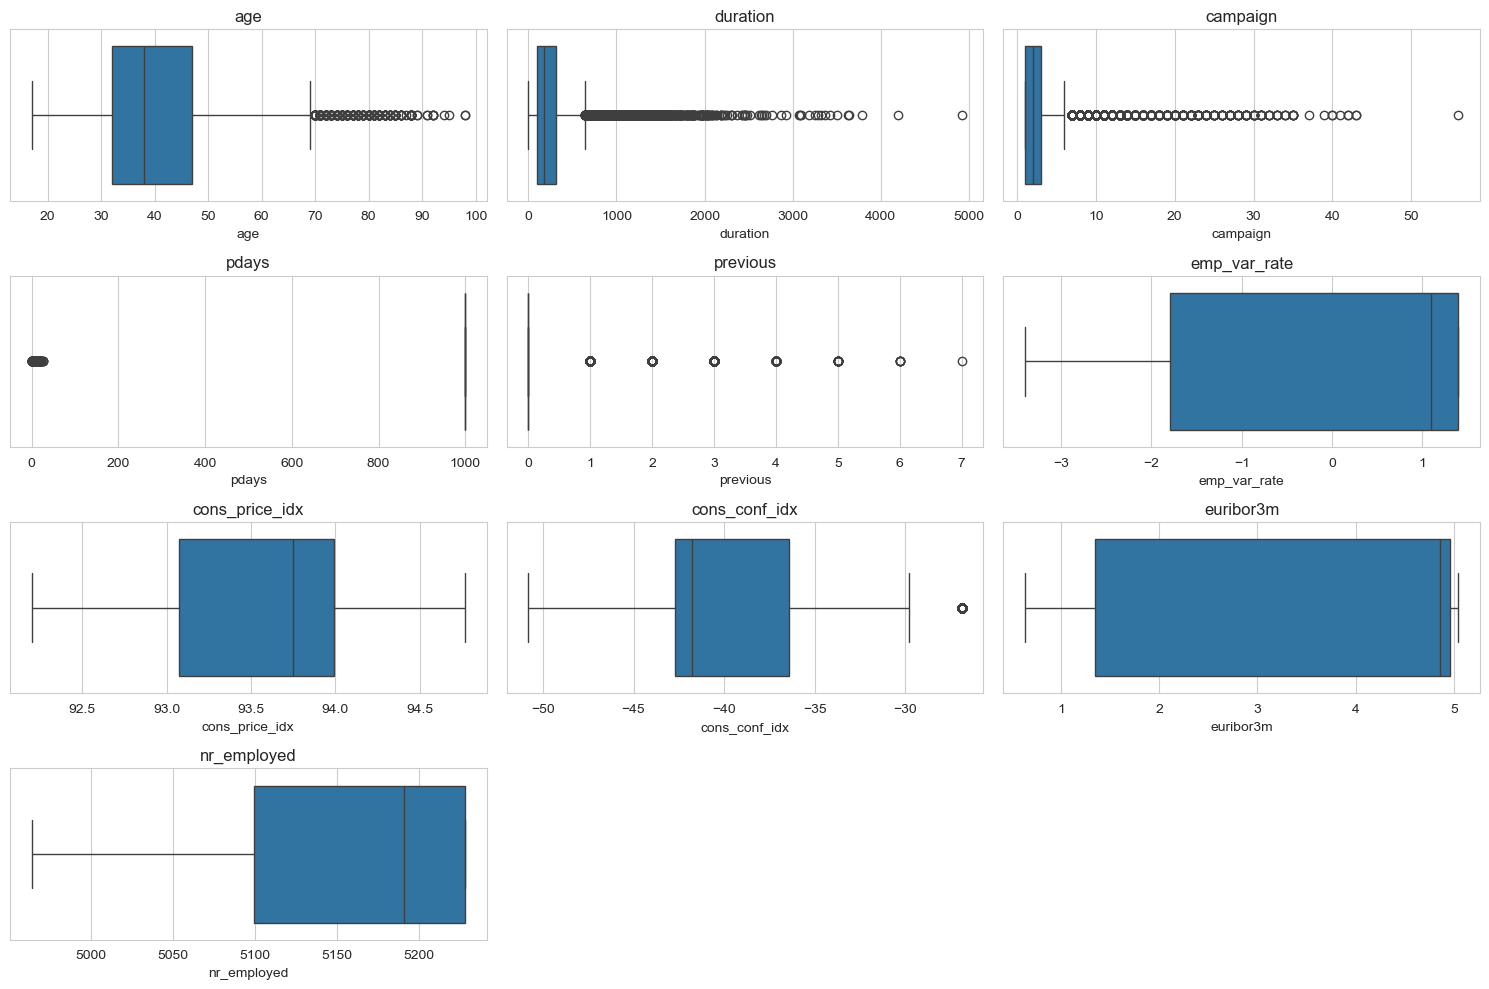

In [31]:
# Boxplots to check outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Check `pdays`, `previous`, `duration`, `campaign`

- `duration`: large values are true. Leave it be for now, since most models used are tree-based models.
- `pdays` & `previous`: These two share overlapping information. pdays = 999 typically means there's no previous campaign in this client's history (hence, previous = 0). Since we'll mostly be using tree-based models, can leave it be. 
    - The concern is, however, $n_{pdays = 999} = 39673$ and $n_{previous = 0} = 35563$ are inconsistent. The $n_{poutcome = 'nonexistent'} = 35563$ corroborates `previous` data that 35563 clients had no previous campaign.
    - We have no insight on what causes 4110 more 999s in `pdays`. Could be real that these clients' previous campaign was so long ago that it was recorded as 999. -> **Leave it be for now**
    - From the subsequent bivariate analysis, we can see that `pdays` and `previous` are correlated (r = 0.59), but not highly. Keep all in.

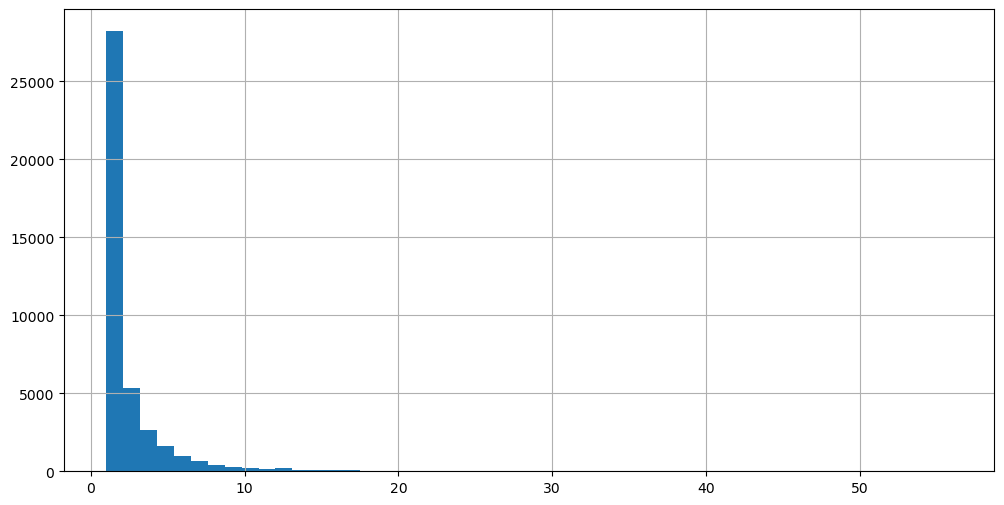

In [139]:
df['campaign'].hist(bins = 50)
# df['campaign'].transform(lambda x: np.log(1+x)).hist(bins = 50)
plt.show()

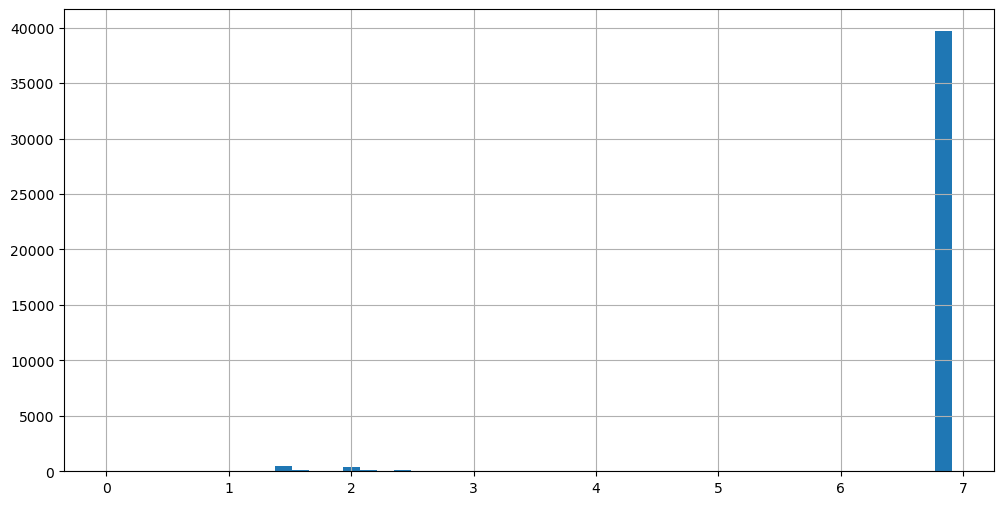

In [ ]:
df['pdays'].transform(lambda x: np.log(1+x)).hist(bins = 50)
plt.title('p')
plt.show()

In [132]:
print(df.pdays.value_counts(normalize=False).sort_index(ascending = False))

print(f"No previous campaign: {df[df.poutcome == 'nonexistent'].shape[0]}\
      \nSubscribed: {df[df.poutcome=='success'].shape[0]}\
      \nNotsubscribed: {df[df.poutcome=='failure'].shape[0]}")

pdays
999    39673
27         1
26         1
25         1
22         3
21         2
20         1
19         3
18         7
17         8
16        11
15        24
14        20
13        36
12        58
11        28
10        52
9         64
8         18
7         60
6        412
5         46
4        118
3        439
2         61
1         26
0         15
Name: count, dtype: int64
No previous campaign: 35563      
Subscribed: 1373      
Notsubscribed: 4252


In [ ]:
print('previous:', df.previous.value_counts(normalize=True))

print('pdays:', df.pdays.value_counts(normalize=True).sort_index(ascending = False))

print('poutcome:', df.poutcome.value_counts(normalize=True))

# print('campaign:', df.campaign.value_counts(normalize=True).sort_index(ascending = False))

campaign: campaign
56        1
43        2
42        2
41        1
40        2
39        1
37        1
35        5
34        3
33        4
32        4
31        7
30        7
29       10
28        8
27       11
26        8
25        8
24       15
23       16
22       17
21       24
20       30
19       26
18       33
17       58
16       51
15       51
14       69
13       92
12      125
11      177
10      225
9       283
8       400
7       629
6       979
5      1599
4      2651
3      5341
2     10570
1     17642
Name: count, dtype: int64


### Categorical Features Distribution

In [35]:
df.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

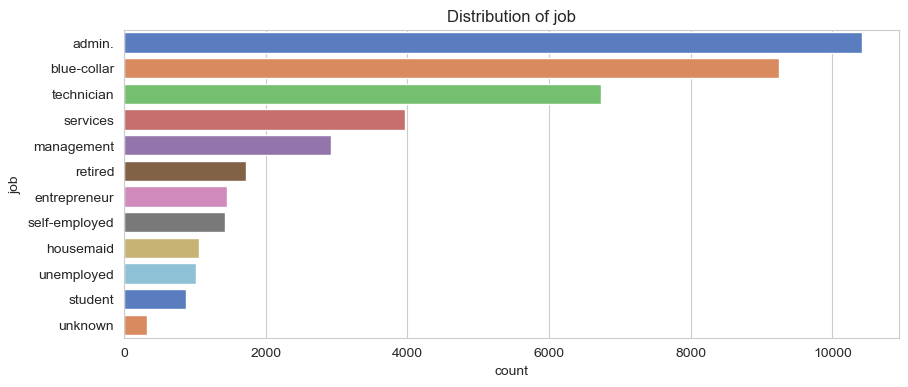

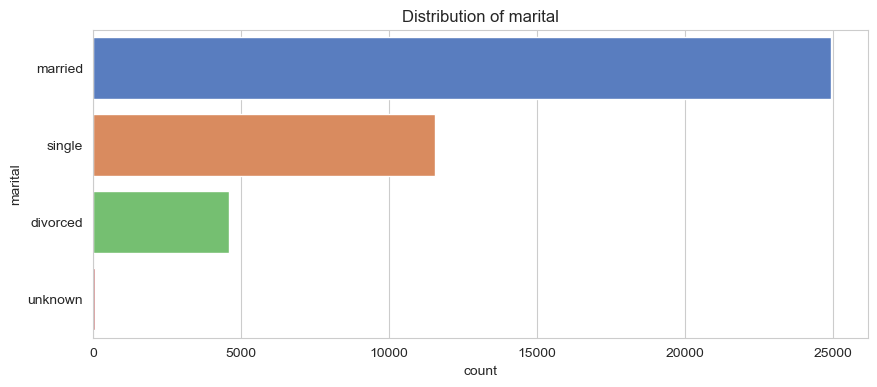

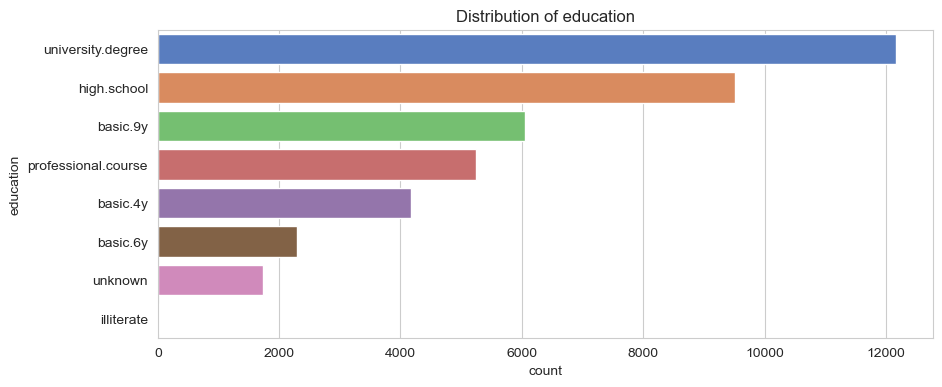

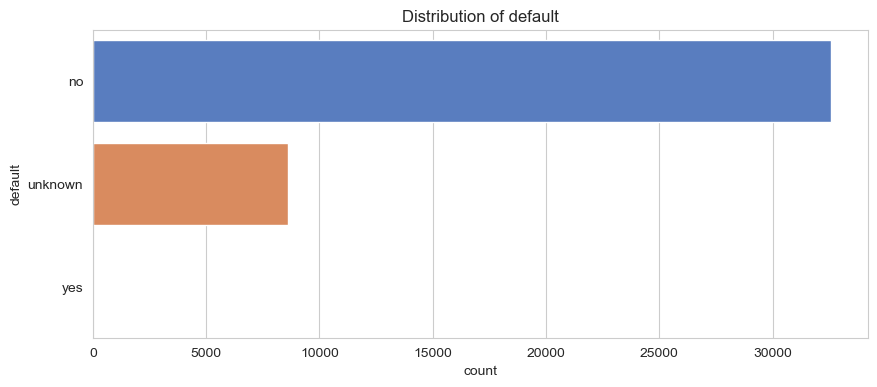

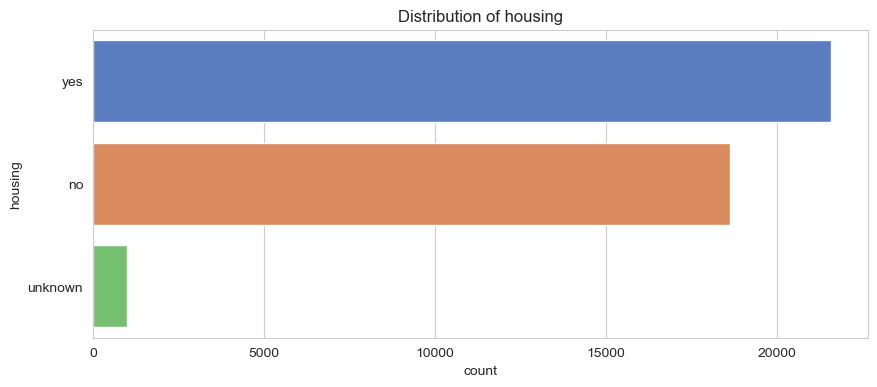

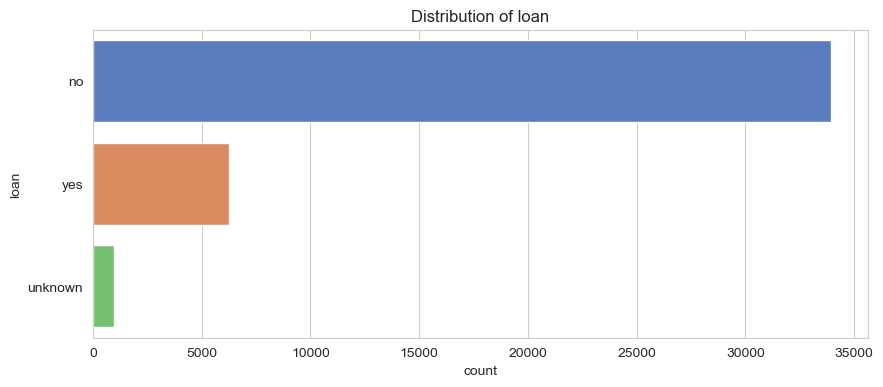

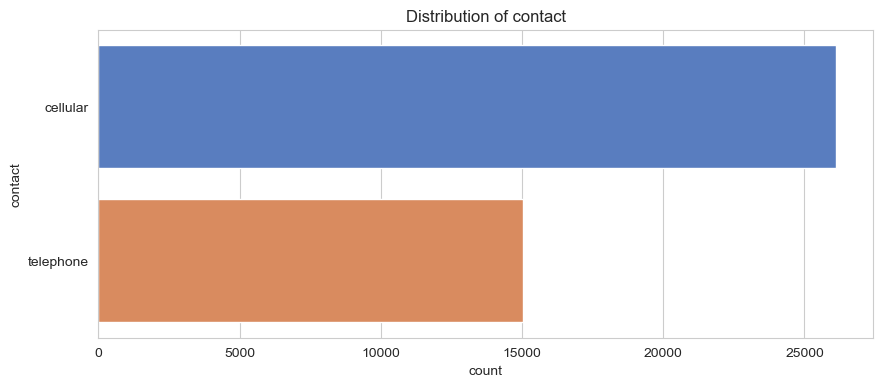

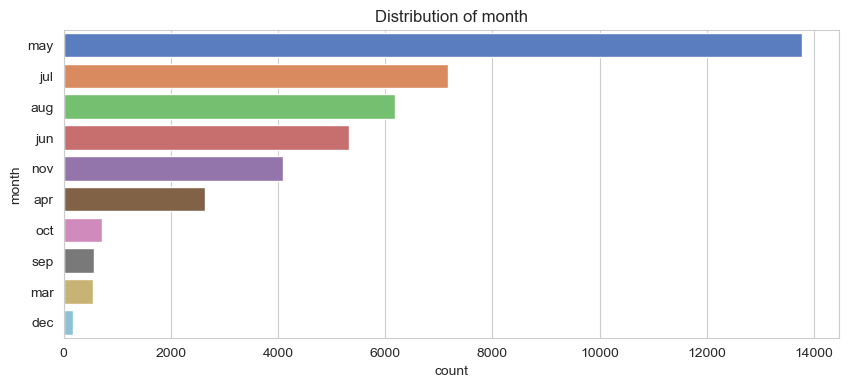

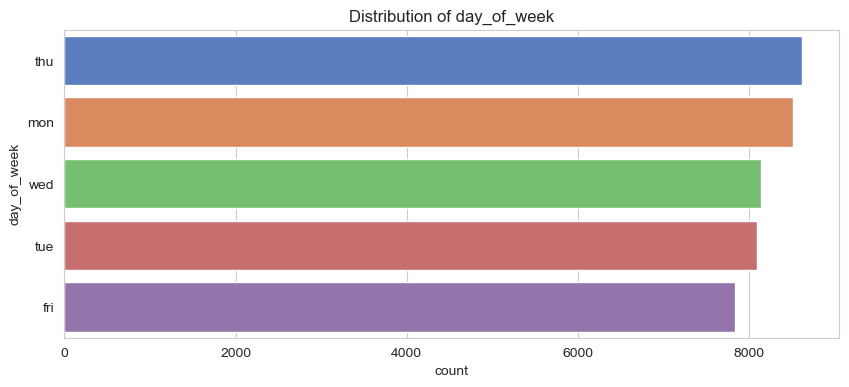

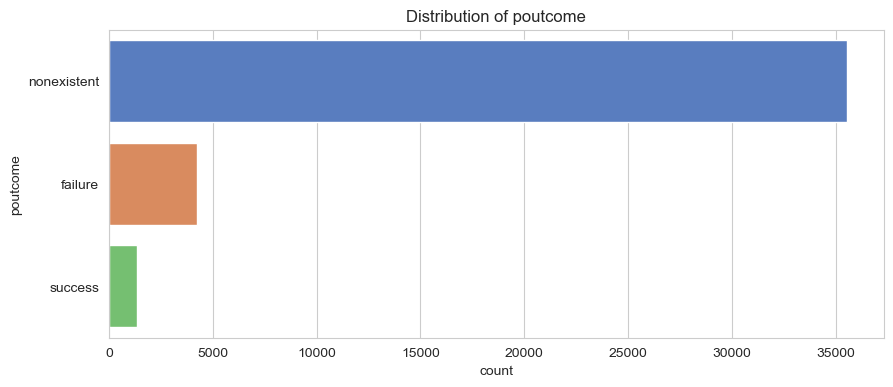

In [22]:
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')
    plt.title(f'Distribution of {col}')
    plt.show()

Three columns have rare values:
- `default`: 3 'yes' (into 'unknown')
- `education`: 18 'illiterate' (collapse into 'unknown')
- `marital`: 80 'unknown' (let it be)

df is modified at the end.

## 4. Bivariate Analysis
Analyzing the relationship between features and the target variable.

### Numeric vs Target

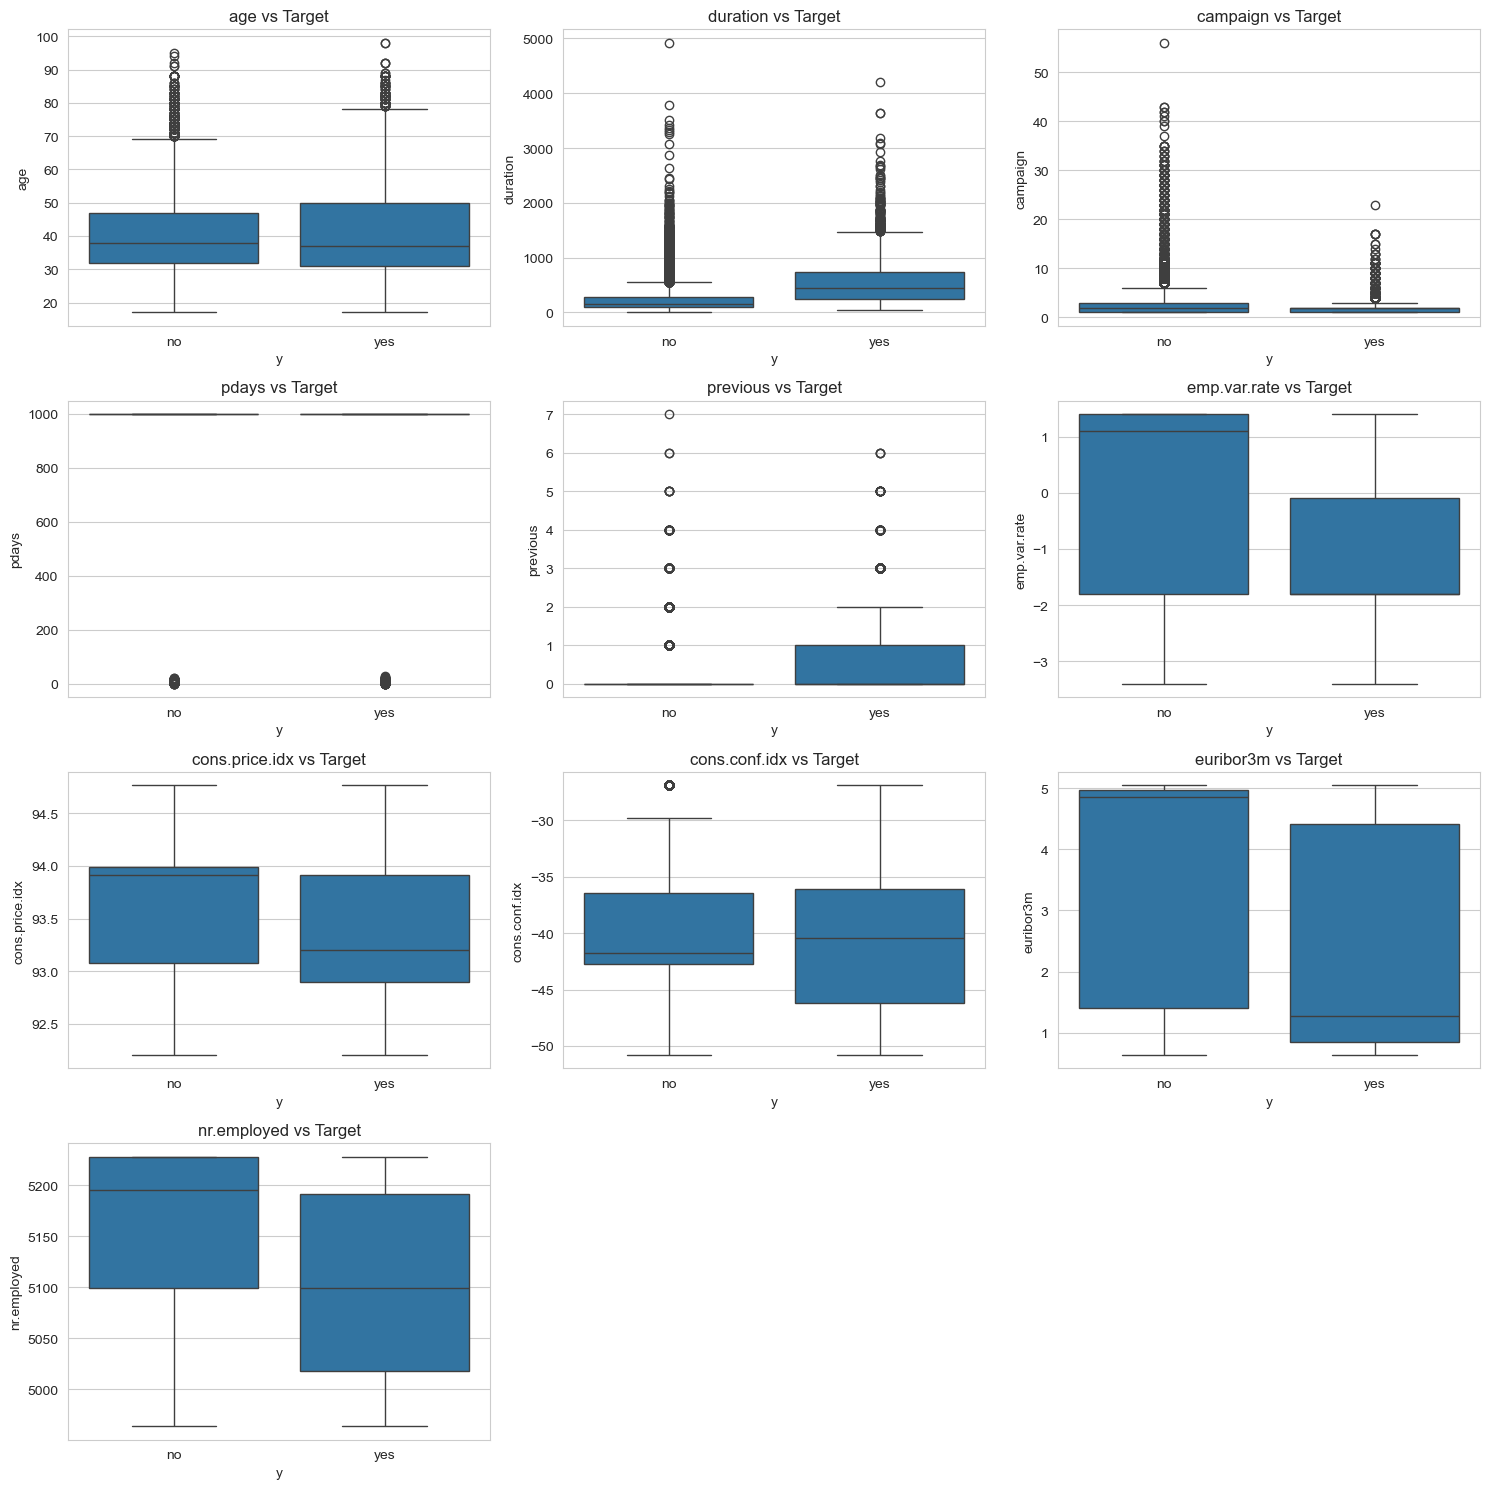

In [ ]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs Target')
plt.tight_layout()
plt.show()

Key observations:
- `duration`: shows a very strong relationship (longer calls -> higher subscription rate).
- `euribor3m`, `nr_employed`: Economic indicators show distinct distributions for 'yes' vs 'no'.

### Categorical vs Target

In [104]:
df.groupby('default')['y'].value_counts(normalize=True).unstack()

y,no,yes
default,,
no,0.87121,0.12879
unknown,0.94847,0.05153
yes,1.00000,NaN


Breaking the yes/no distribution per category

In [55]:
rows = []

for col in categorical_cols:
    tmp = (
        df.groupby(col)["y"]
          .value_counts(normalize=True)     # within each category
          .rename("proportion")
          .reset_index()
    )
    tmp = tmp.rename(columns={col: "category"})
    tmp["feature"] = col
    rows.append(tmp)

plot_df = pd.concat(rows, ignore_index=True)

plot_df.head()


,category,y,proportion,feature
0,admin.,no,0.870274,job
1,admin.,yes,0.129726,job
2,blue-collar,no,0.931057,job
3,blue-collar,yes,0.068943,job
4,entrepreneur,no,0.914835,job


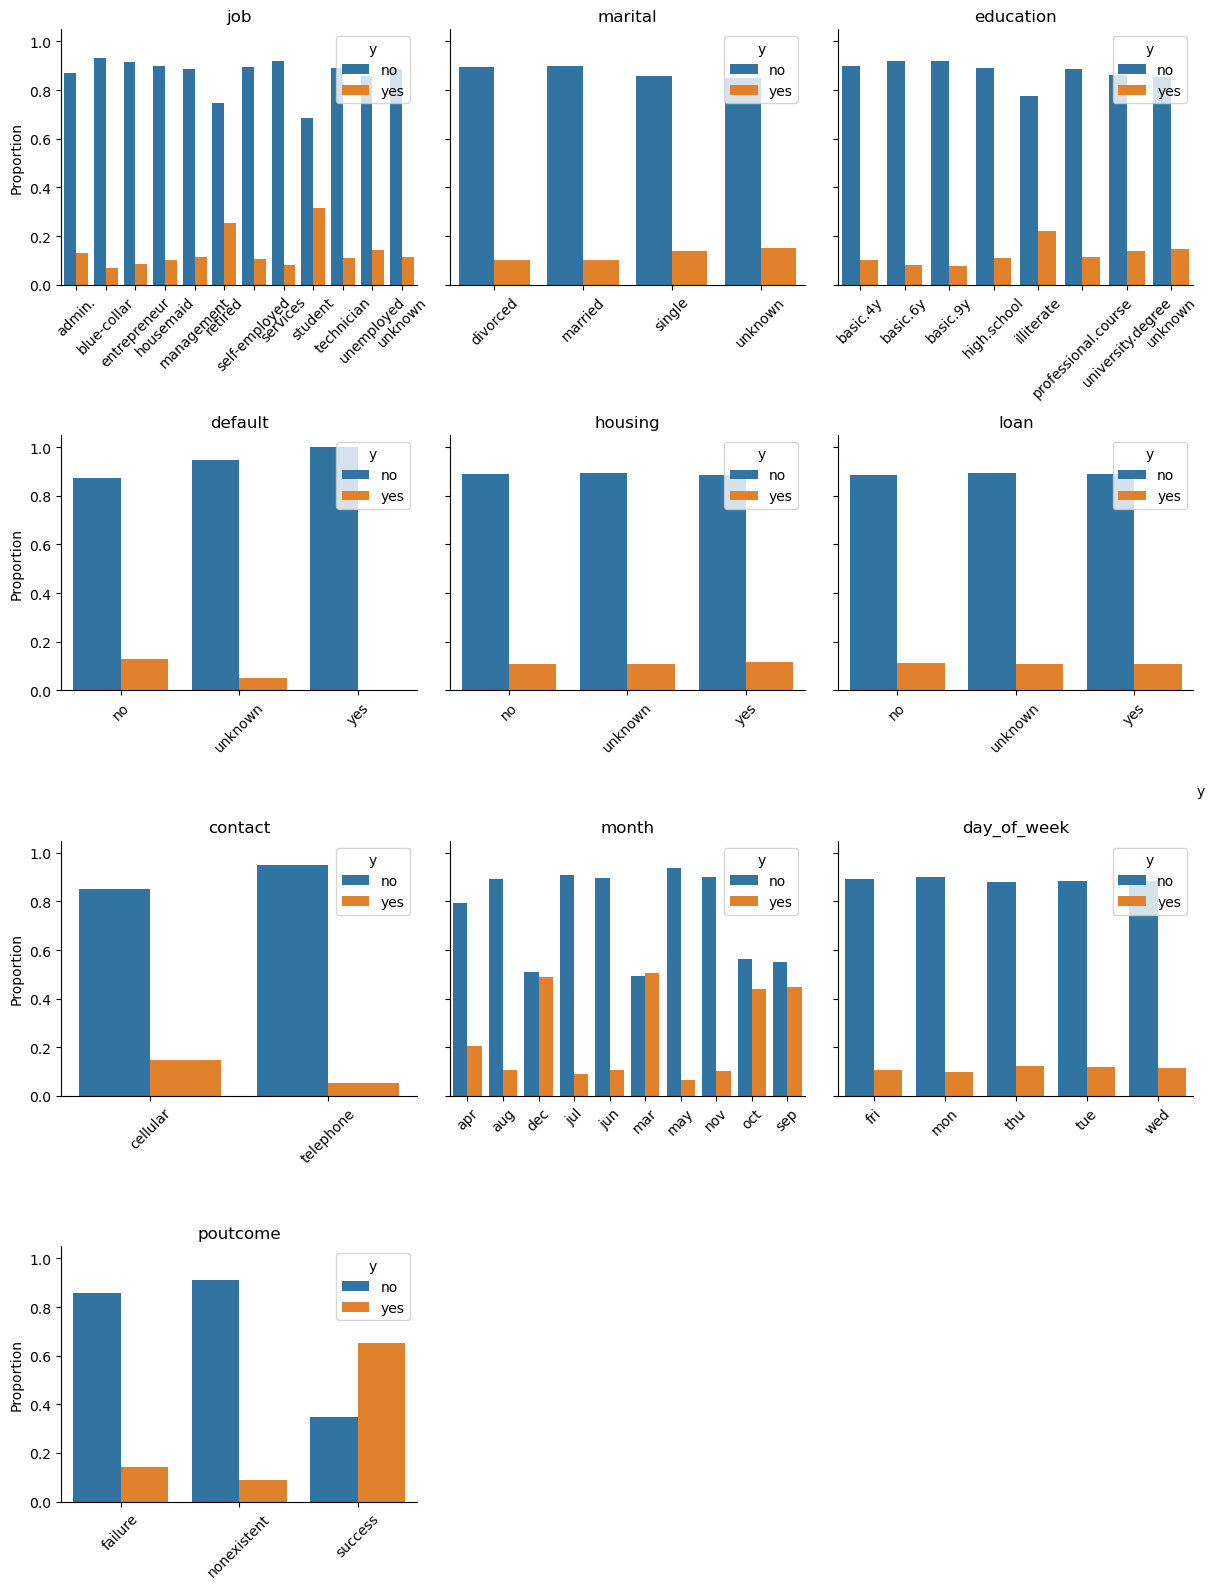

In [56]:
g = sns.FacetGrid(
    plot_df,
    col="feature",
    col_wrap=3,
    sharex=False,
    sharey=True,
    height=4
)

for ax, (feat, subdf) in zip(g.axes.flat, plot_df.groupby("feature", sort=False)):
    sns.barplot(
        data=subdf,
        x="category",
        y="proportion",
        hue="y",
        ax=ax
    )
    ax.set_title(feat)
    ax.tick_params(axis="x", rotation=45)
    ax.set_xlabel("")

g.add_legend(title="y")
g.set_axis_labels("", "Proportion")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

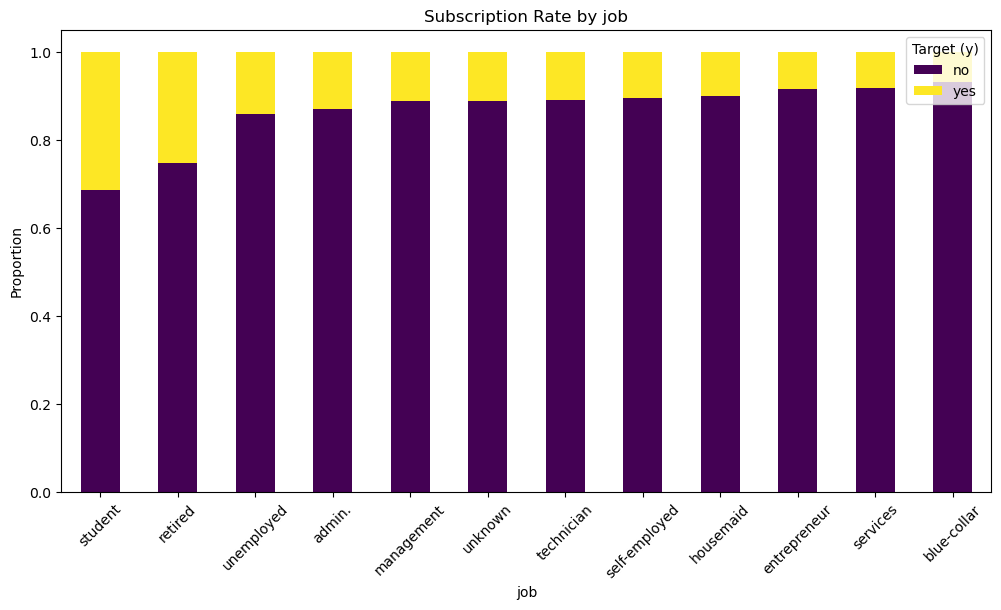

<Figure size 1000x600 with 0 Axes>

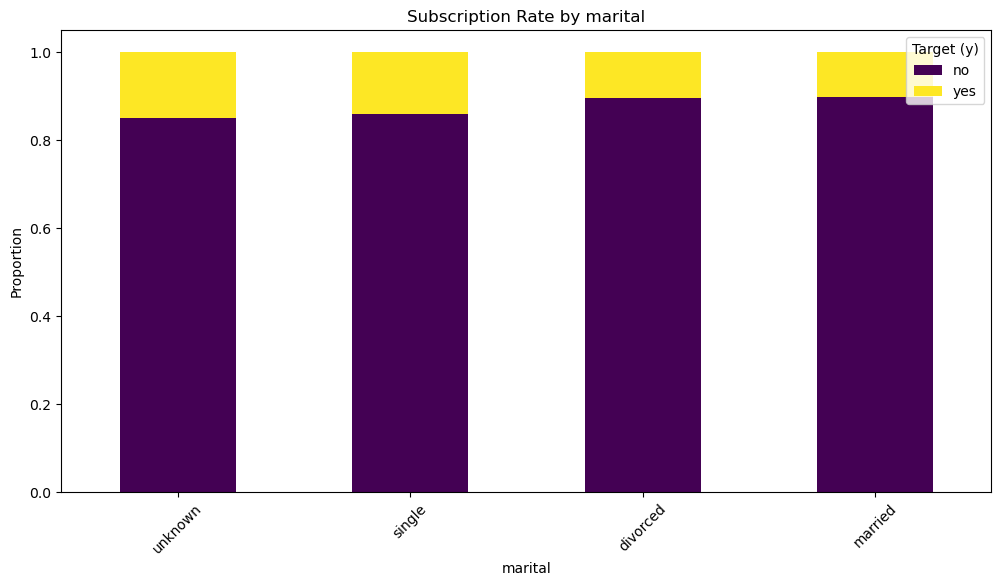

<Figure size 1000x600 with 0 Axes>

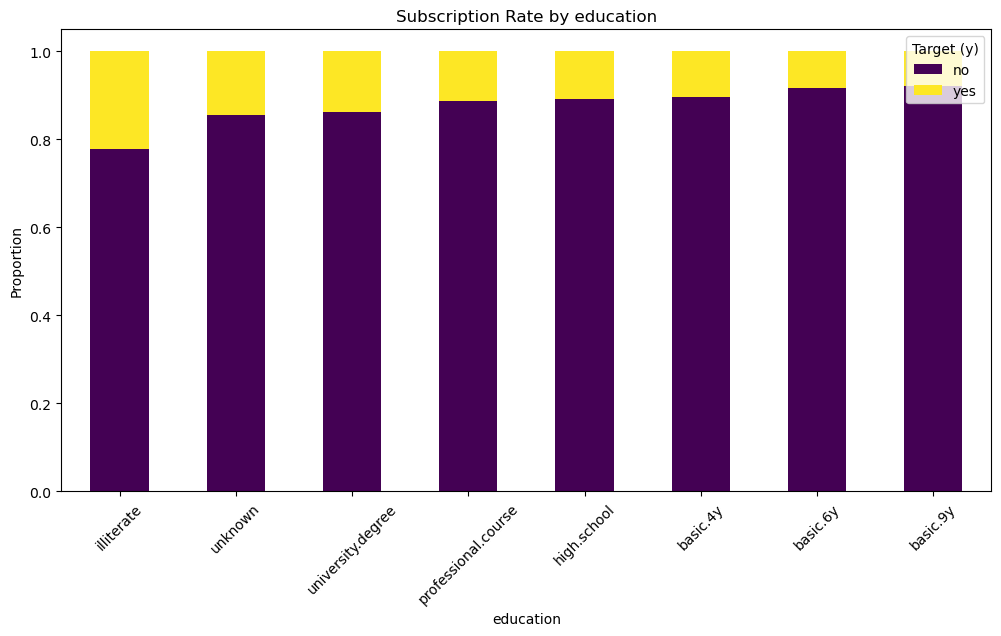

<Figure size 1000x600 with 0 Axes>

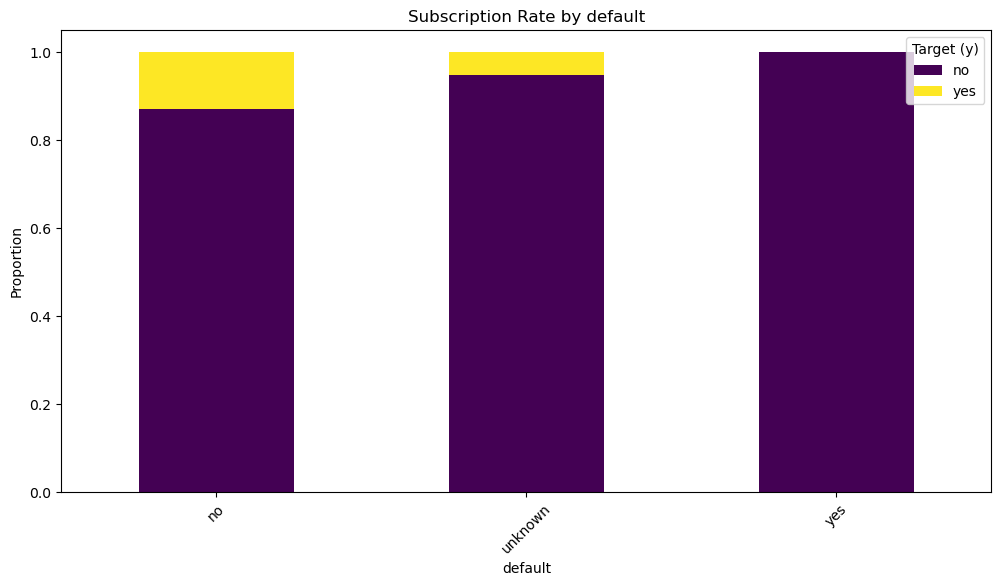

<Figure size 1000x600 with 0 Axes>

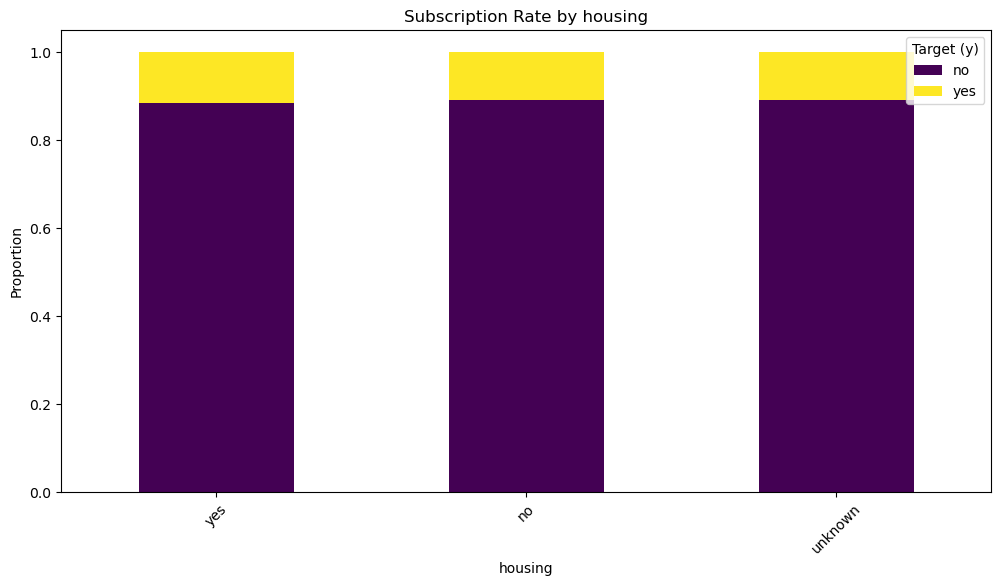

<Figure size 1000x600 with 0 Axes>

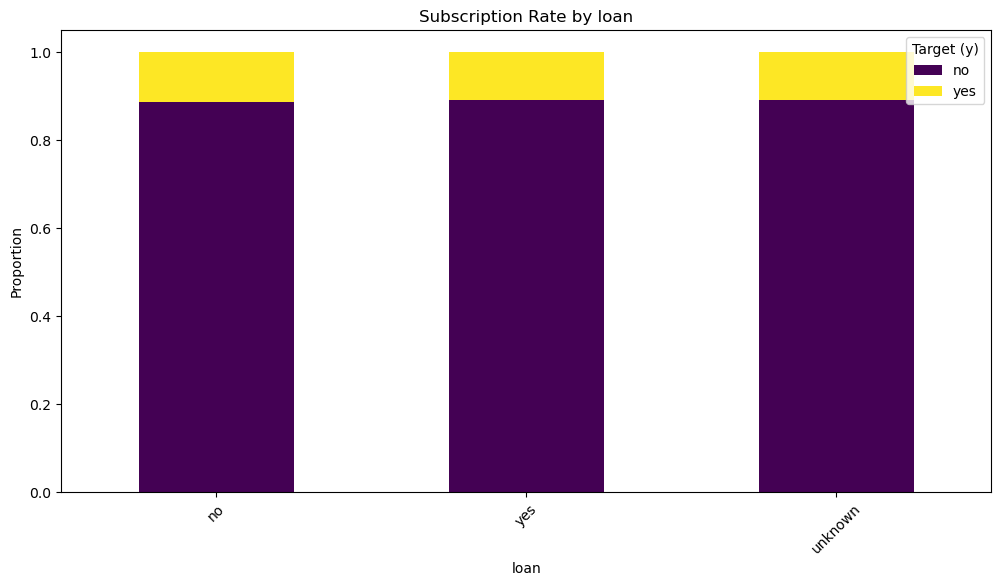

<Figure size 1000x600 with 0 Axes>

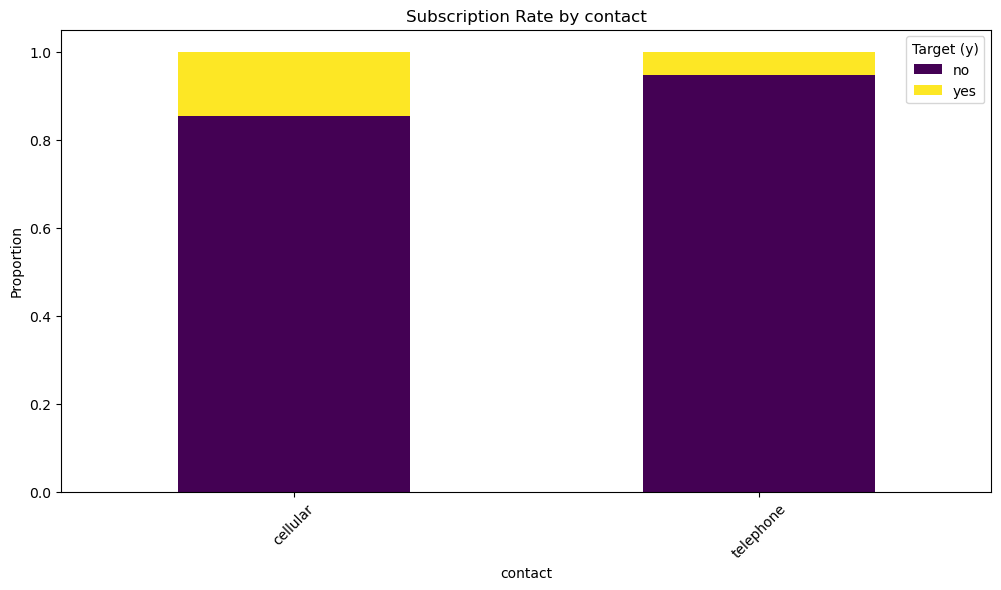

<Figure size 1000x600 with 0 Axes>

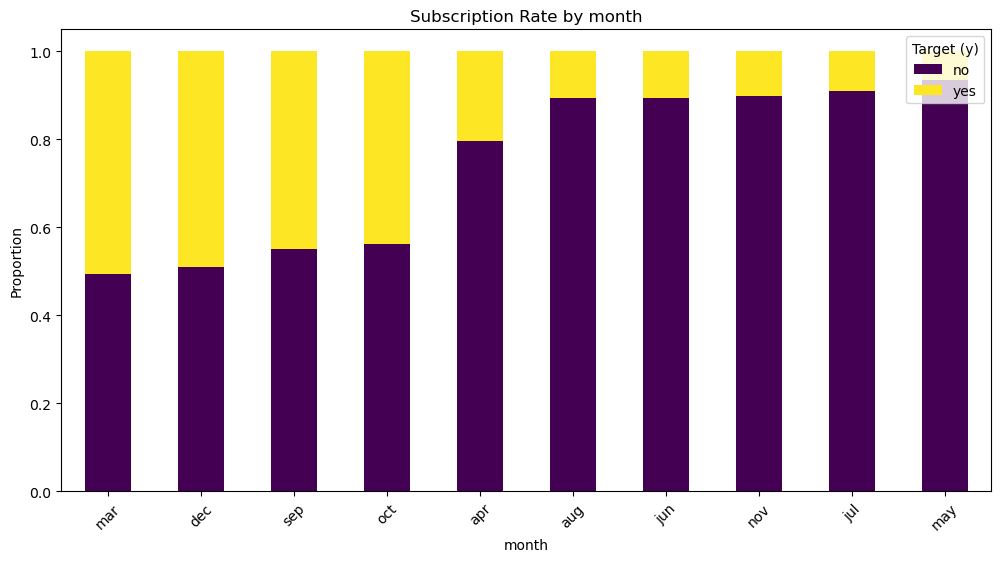

<Figure size 1000x600 with 0 Axes>

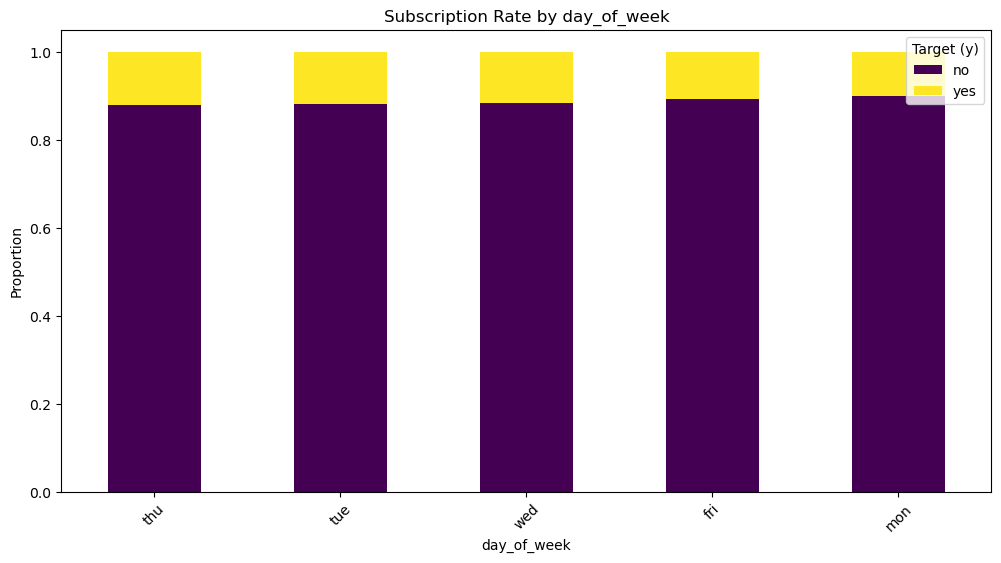

<Figure size 1000x600 with 0 Axes>

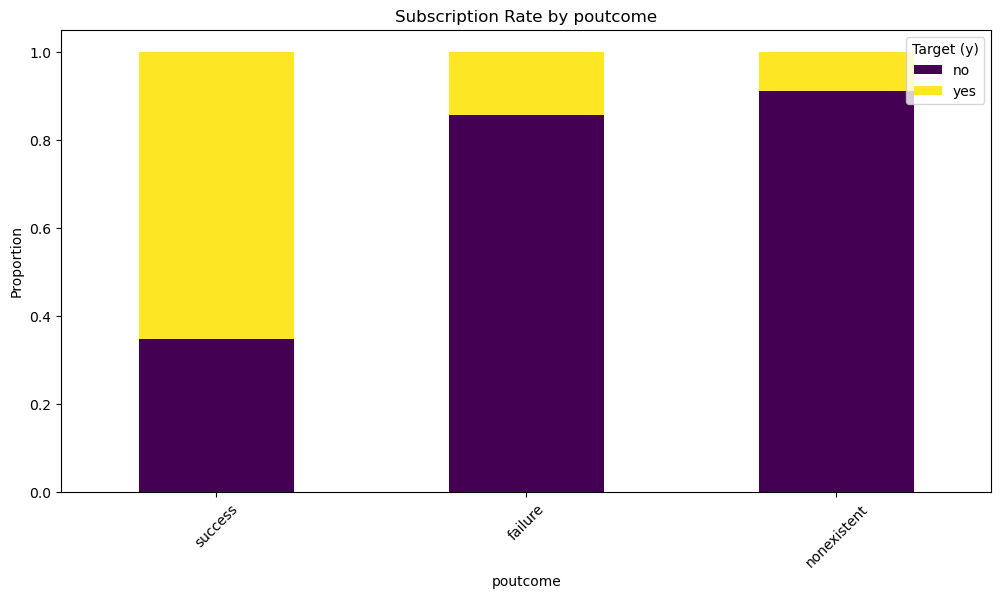

In [52]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    # Calculate proportion of 'yes' for each category
    prop_df = df.groupby(col)['y'].value_counts(normalize=True).unstack()
    if 'yes' in prop_df.columns:
        prop_df = prop_df.sort_values('yes', ascending=False)
    
    prop_df.plot(kind='bar', stacked=True, colormap='viridis', rot=45)
    plt.title(f'Subscription Rate by {col}')
    plt.ylabel('Proportion')
    plt.legend(title='Target (y)', loc='upper right')
    plt.show()

## 5. Correlation Analysis

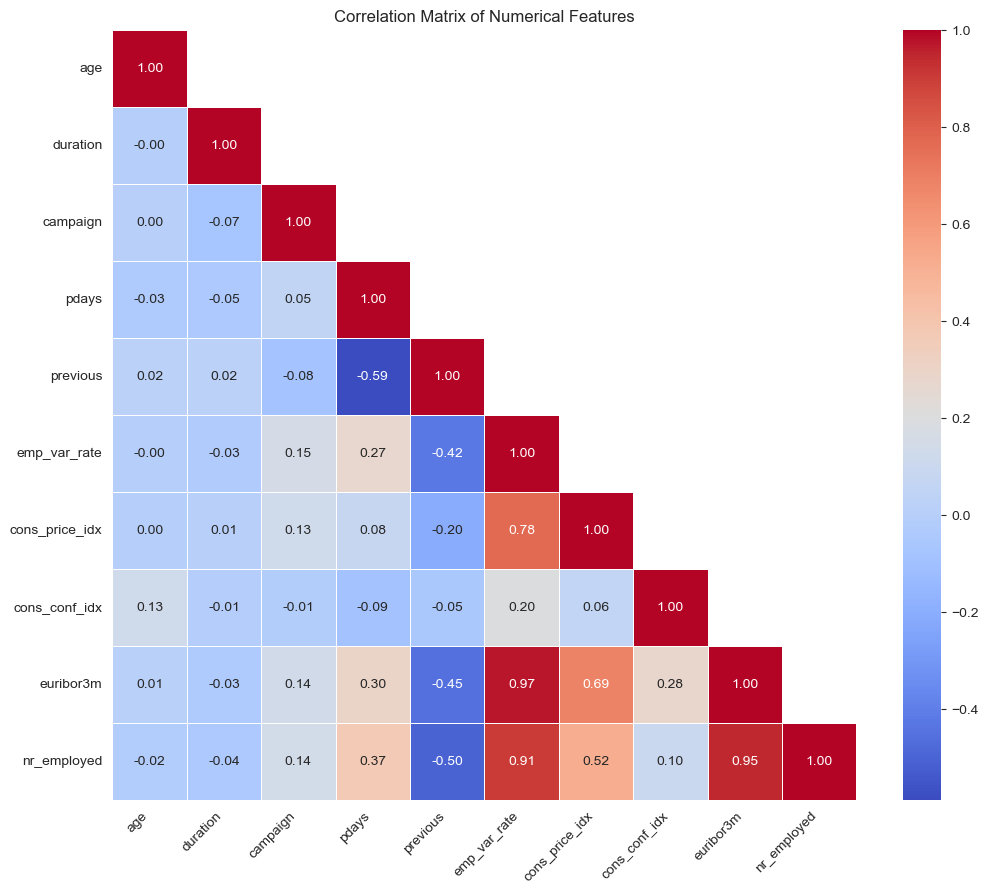

In [ ]:
# Correlation Matrix for numerical features
plt.figure(figsize=(12, 10))
corr_matrix = df[numeric_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Numerical Features')
plt.grid(False)
plt.show()

Strong correlations to note:
- `emp_var_rate`, `euribor3m`, `nr_employed` are highly correlated with each other, representing the economic context.

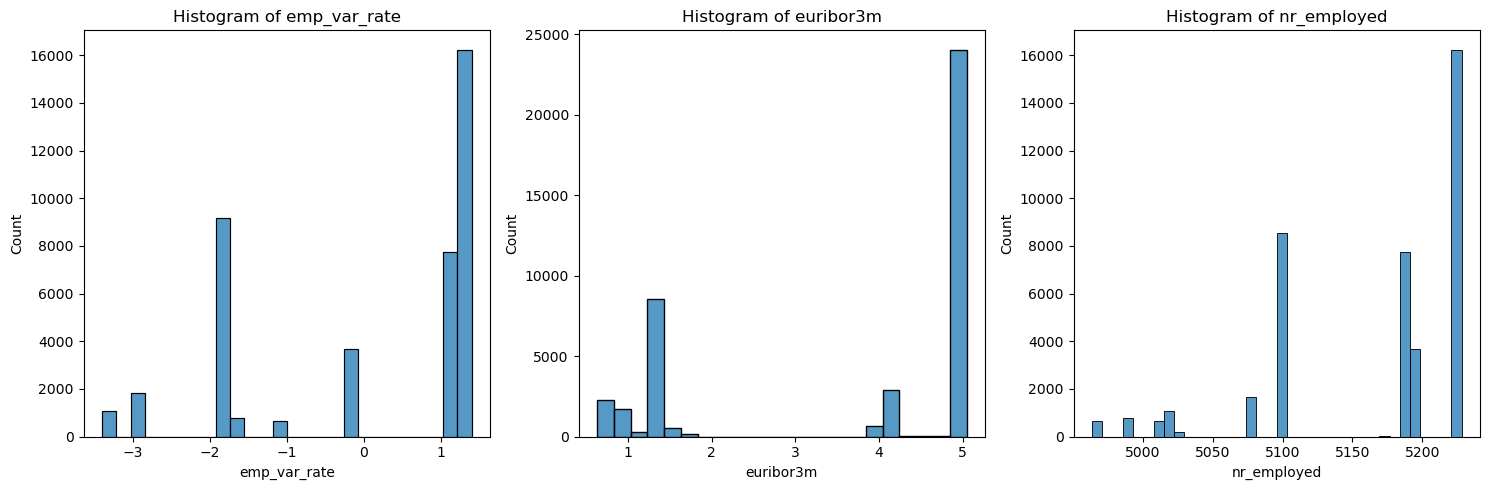

In [151]:
hc_cols = ['emp_var_rate', 'euribor3m', 'nr_employed']
# hc_cols = ['cons_conf_idx', 'cons_price_idx']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(hc_cols):
    sns.histplot(df[col], ax=ax[i])
    ax[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


In [141]:
for col in hc_cols:
    print(f"{col} unique values:")
    print(len(df[col].unique()))
    print("-" * 20)

cons_conf_idx unique values:
26
--------------------
cons_price_idx unique values:
26
--------------------


In [ ]:
# df[['emp_var_rate', 'euribor3m']].corr()
plt.scatter(df['emp_var_rate'], df['euribor3m'])

Pearson r = 0.9722, p-value = 0.00e+00
Spearman rho = 0.9399, p-value = 0.00e+00
Linear regression slope p-value = 0.00e+00


Among these three indicators, keep euribor3m as it has the daily information (more granual) and remove the other two.

## 6. Dataframe Manipulation

- drop `emp_var_rate` and `np_employed` columns
- replaced 'yes' with 'unknown' in `default` column
- replaced 'illiterate' with 'unknown' in `education` column.

In [119]:
# Data manipulation: 

df['default'] = df['default'].transform(lambda x: x.replace('yes', 'unknown'))
df['education'] = df['education'].transform(lambda x: x.replace('illiterate', 'unknown'))

df.drop(['emp_var_rate', 'nr_employed'], axis=1, inplace=True)

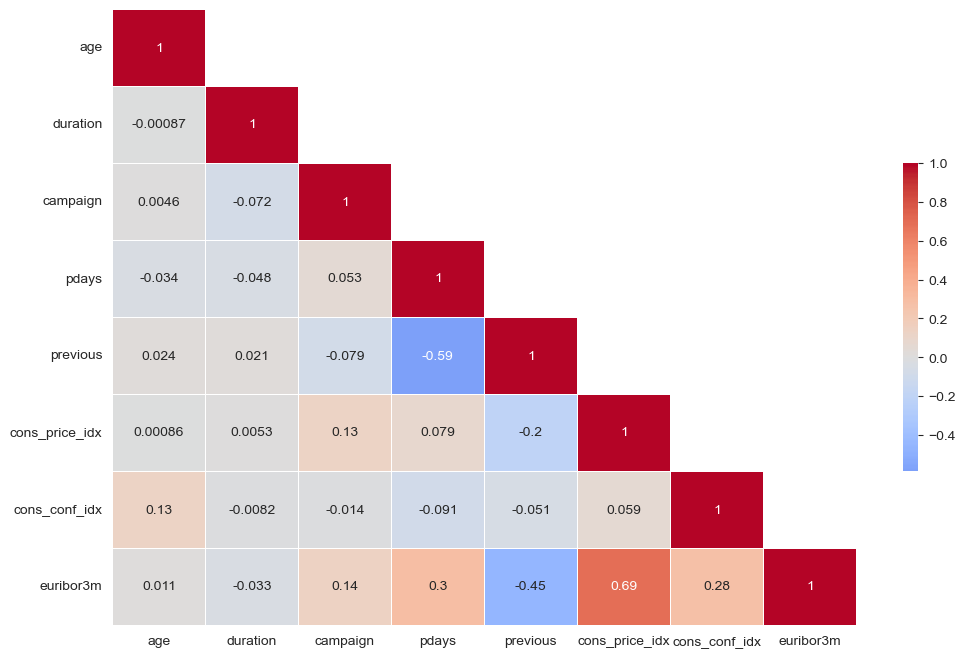

In [133]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[[cols for cols in df.columns if df[cols].dtype != 'object']].corr(),
            annot=True,
            mask = np.triu(np.ones_like(df[[cols for cols in df.columns if df[cols].dtype != 'object']].corr(), dtype=bool), k = 1),
            cmap = 'coolwarm',
            center = 0,
            linewidths = 0.5,
            cbar_kws = {'shrink': 0.5})
plt.grid(False)
plt.show()

In [ ]:
df.to_csv('data/bank-additional-full-cleaned.csv', index=False)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no
